<a href="https://colab.research.google.com/github/sm0602/MLnow_2.0/blob/main/EDA%26UnivariateLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Univariate Linear Regression Assignment`

[Link to Download the dataset](https://www.kaggle.com/mohansacharya/graduate-admissions)

**Date Created**: June 13, 2021


**Author**:
 Samiksha Mathur

 [[Assessment Repository](https://github.com/sm0602/MLnow_2.0)] 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
cd '/content/drive/MyDrive/LiveCodeSession/02_EDA'

/content/drive/MyDrive/LiveCodeSession/02_EDA


In [59]:
ls

 02_EDA.ipynb                            MultivariateLinearRegression.ipynb
 Admission_Predict_Ver1.1.csv            student/
'Bike sharing dataset'/                  Univariate_admissionData.csv
'EDA&UnivariateLinearRegression.ipynb'   UnivariateLinearRegression.ipynb
'Istanbul stock exchange'/


In [60]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
admission_data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [62]:
admission_data = admission_data.drop('Serial No.', 1)

In [63]:
admission_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [64]:
admission_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [65]:
admission_data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

##Data Visualization

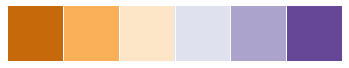

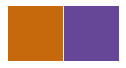

In [66]:
sns.palplot(sns.color_palette("PuOr"))
pal = sns.color_palette('PuOr', 6)
pal.as_hex()

plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors)
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [67]:
print(f'''There are {len(admission_data.columns)} columns in the dataframe admission_data namely,
{admission_data.columns}''')

There are 8 columns in the dataframe admission_data namely,
Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


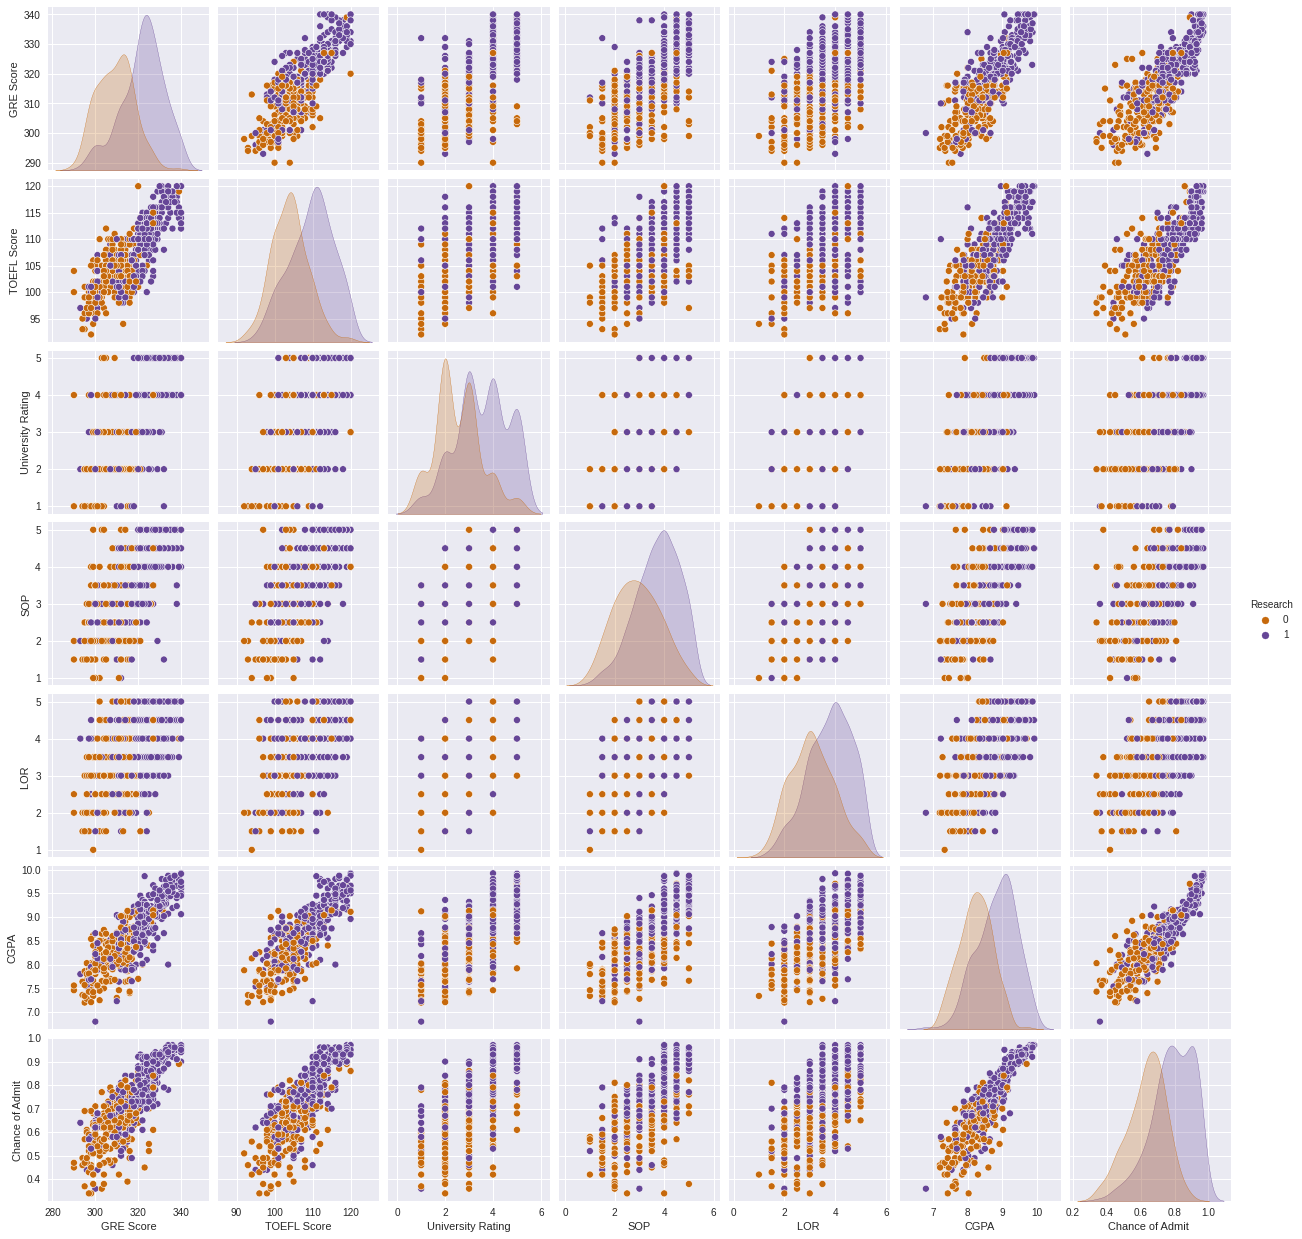

In [68]:
sns.pairplot(admission_data,
             x_vars = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Chance of Admit '],
             y_vars = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Chance of Admit '],
            diag_kind = 'kde', hue = 'Research')

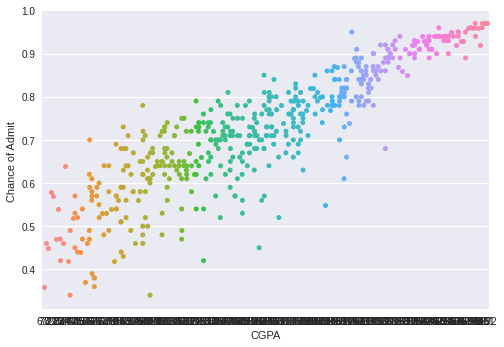

In [69]:
sns.stripplot(x='CGPA', y='Chance of Admit ', data=admission_data)

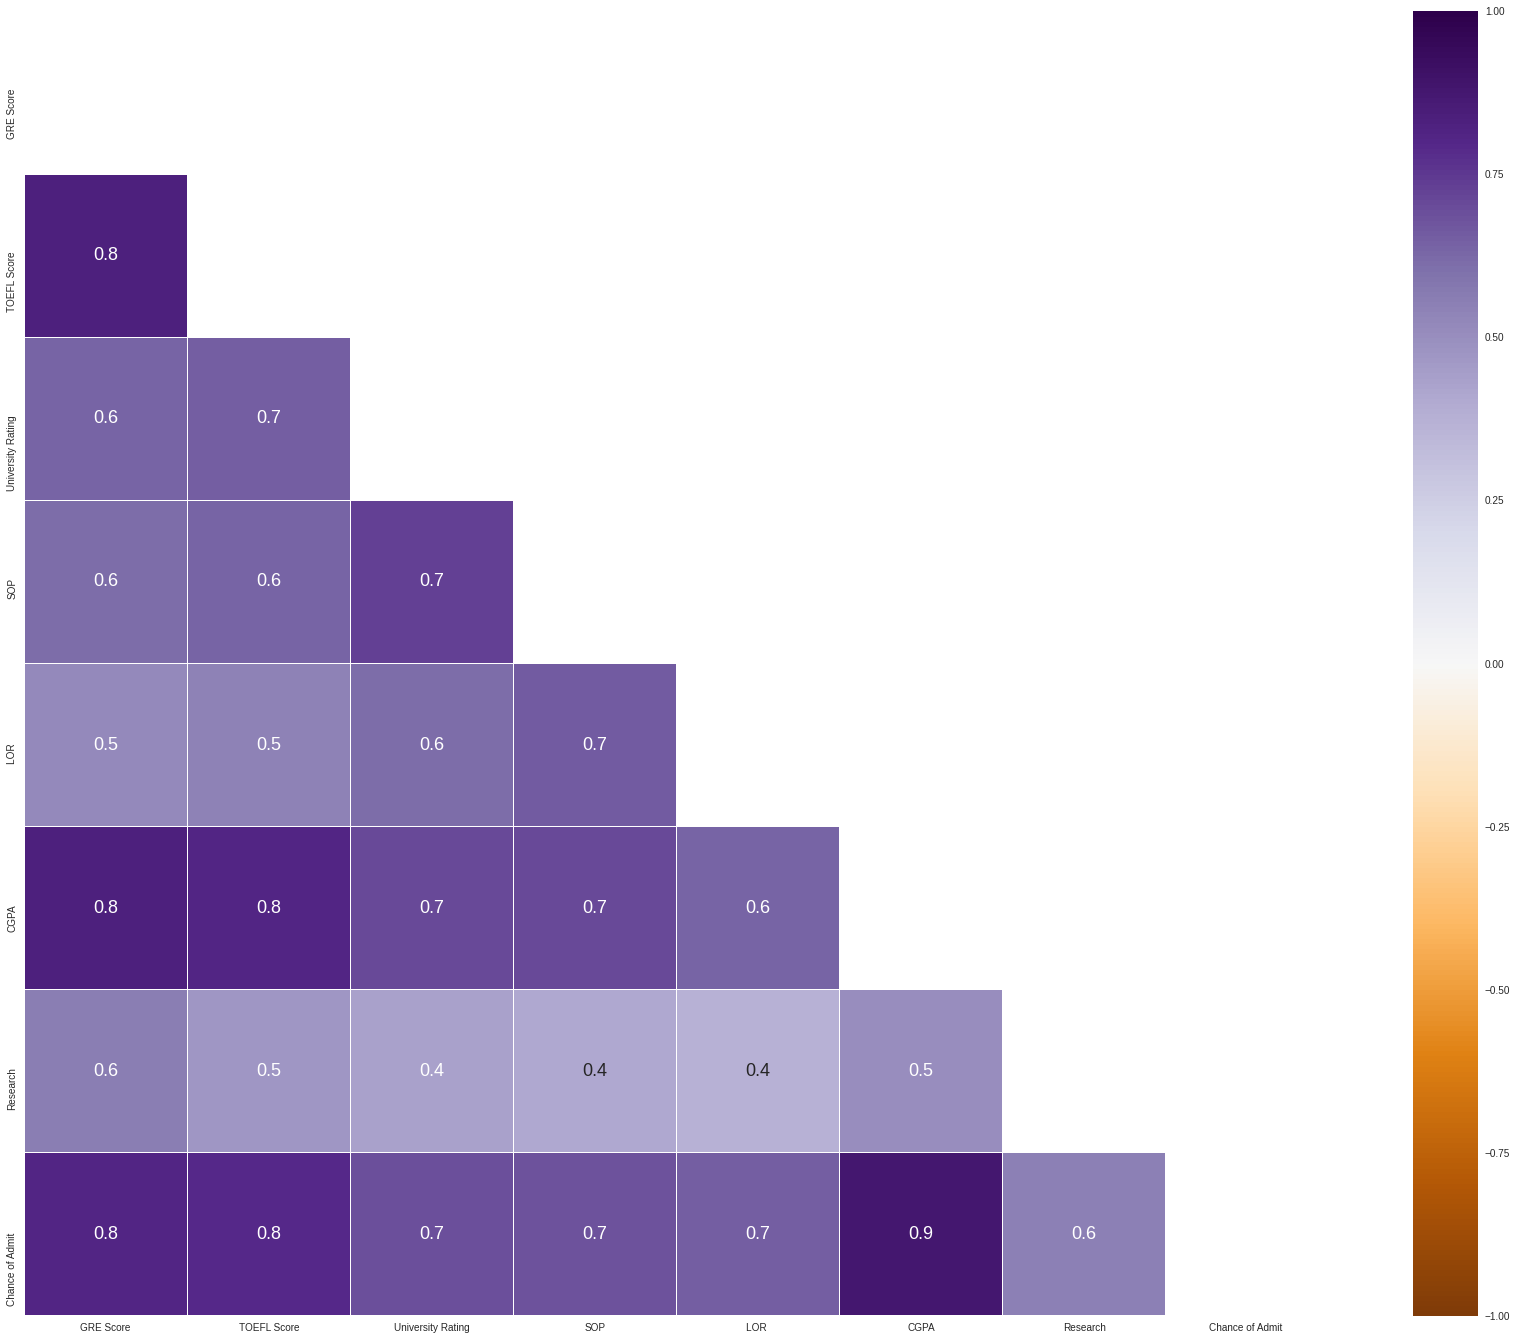

In [70]:
# Create a correlation for the dataset.
dataset_corr = admission_data.corr().round(2)

# Create a correlation matrix. Only bottom left corner valued. 
mask = np.zeros_like(dataset_corr.round(2))
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(30, 24))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center = 0, vmin=-1, square=True, cmap='PuOr', linewidths=.5, annot=True, annot_kws={"size": 18}, fmt='.1f', )
plt.show()

Text(0.5, 1.0, 'Count of Research variable')

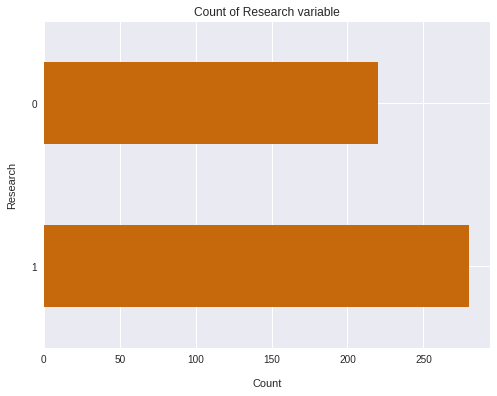

In [71]:
admission_data['Research'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Research', labelpad=14)
plt.title('Count of Research variable')

##Univariate Linear Regression

We are just going to consider the columns `CGPA` and `Chance of Admit`  for univariate linear regression.

In [72]:
uniAdmissionData = admission_data[['CGPA','Chance of Admit ']]
uniAdmissionData.head()

,CGPA,Chance of Admit
0,9.65,0.92
1,8.87,0.76
2,8.00,0.72
3,8.67,0.80
4,8.21,0.65


In [ ]:
uniAdmissionData.to_csv('Univariate_admissionData.csv')

In [ ]:
ls

 02_EDA.ipynb                            MultivariateLinearRegression.ipynb
 Admission_Predict_Ver1.1.csv            student/
'Bike sharing dataset'/                  Univariate_admissionData.csv
'EDA&UnivariateLinearRegression.ipynb'   UnivariateLinearRegression.ipynb
'Istanbul stock exchange'/


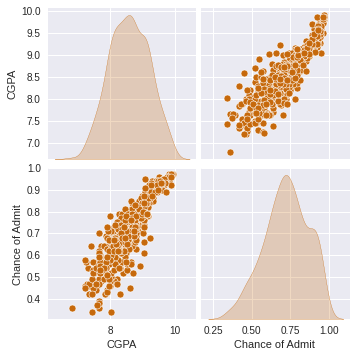

In [73]:
sns.pairplot(uniAdmissionData,
             x_vars = ['CGPA', 'Chance of Admit '],
             y_vars = ['CGPA', 'Chance of Admit '],
             diag_kind = 'kde')

#Data Split

In [74]:
#80-20 train-test percent split

trainDataset = uniAdmissionData.sample(frac=0.8, random_state=0)
testDataset = uniAdmissionData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     CGPA  Chance of Admit 
90   7.92              0.64
254  9.12              0.85
283  8.90              0.80
445  9.08              0.91
461  8.13              0.68
    CGPA  Chance of Admit 
9    8.6              0.45
25   9.6              0.94
28   7.2              0.46
31   8.3              0.74
32   9.4              0.91


In [75]:
print(trainDataset.shape)
print(testDataset.shape)

(400, 2)
(100, 2)


In [76]:
# copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     CGPA  Chance of Admit 
90   7.92              0.64
254  9.12              0.85
283  8.90              0.80
445  9.08              0.91
461  8.13              0.68
    CGPA  Chance of Admit 
9    8.6              0.45
25   9.6              0.94
28   7.2              0.46
31   8.3              0.74
32   9.4              0.91


In [77]:
# removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('Chance of Admit ')
testLabels = testFeatures.pop('Chance of Admit ')

print(trainLabels.head())
print(testLabels.head())

90     0.64
254    0.85
283    0.80
445    0.91
461    0.68
Name: Chance of Admit , dtype: float64
9     0.45
25    0.94
28    0.46
31    0.74
32    0.91
Name: Chance of Admit , dtype: float64


In [78]:
print(trainFeatures.head())
print(testFeatures.head())

     CGPA
90   7.92
254  9.12
283  8.90
445  9.08
461  8.13
    CGPA
9    8.6
25   9.6
28   7.2
31   8.3
32   9.4


In [79]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

In [80]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [84]:
numEpochs = 200
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/200
13/13 [==============================] - 0s 13ms/step - loss: 11.2883 - mae: 11.2883 - mse: 128.1620 - val_loss: 11.3177 - val_mae: 11.3177 - val_mse: 128.9712
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 11.1639 - mae: 11.1639 - mse: 125.3498 - val_loss: 11.1927 - val_mae: 11.1927 - val_mse: 126.1407
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 11.0397 - mae: 11.0397 - mse: 122.5776 - val_loss: 11.0675 - val_mae: 11.0675 - val_mse: 123.3381
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 10.9152 - mae: 10.9152 - mse: 119.8294 - val_loss: 10.9423 - val_mae: 10.9423 - val_mse: 120.5679
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 10.7911 - mae: 10.7911 - mse: 117.1247 - val_loss: 10.8171 - val_mae: 10.8171 - val_mse: 117.8278
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 10.6667 - mae: 10.6667 - mse: 114.4429 - val_loss: 10.6919 - val_mae: 1

In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


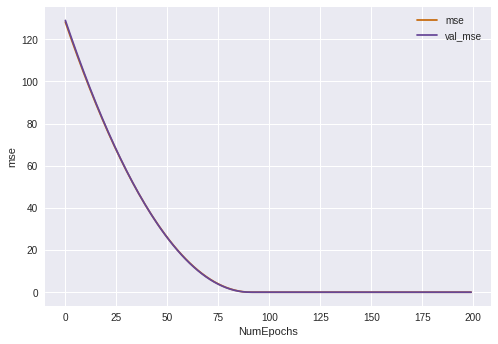

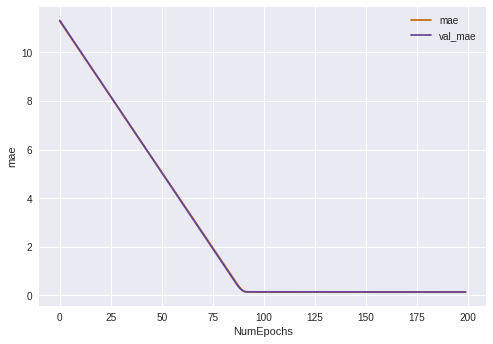

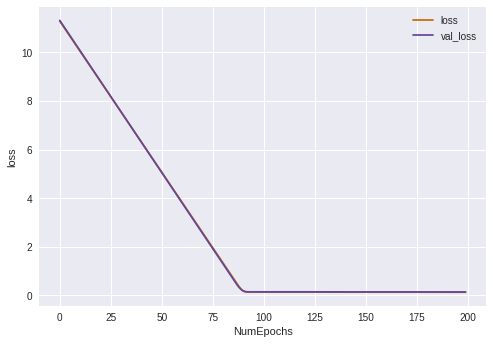

In [86]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [88]:
model.predict([1])

array([[1.0393938]], dtype=float32)

In [89]:
print(testFeatures)

     CGPA
9    8.60
25   9.60
28   7.20
31   8.30
32   9.40
..    ...
472  9.48
482  8.77
483  7.92
486  8.37
498  8.43

[100 rows x 1 columns]


In [98]:
testPreds = model.predict(testFeatures).flatten()

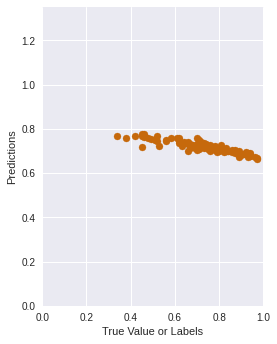

In [99]:
# prediction plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.show()

predPlot(testLabels, testPreds)

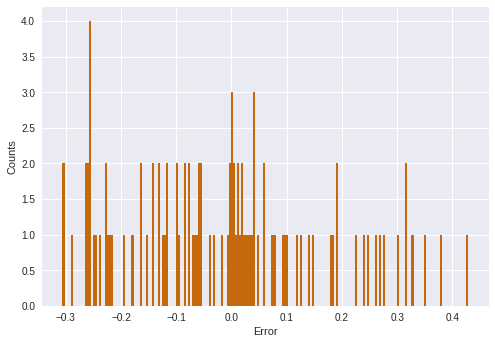

In [100]:
# error plot --> gaussian distribution

def errorPlot(preds, labels, counts):
  errors = preds-labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)